## 1. Understand problem statement

##### First, We should understand problem or question that what do they want from us?

The objective of this project is to build a prediction model to predict whether a mail is spam or not.

## 2. Import required libraries and Data

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('spam.csv',  encoding='iso-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## 3. Check the Data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [11]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


## 4. Data Preprocessing

Here, Last 3 columns are use less

In [14]:
del df['Unnamed: 2']
del df['Unnamed: 3']
del df['Unnamed: 4']

In [15]:
df.rename(columns = {'v1':'Category', 'v2':'Message'}, inplace = True)

In [16]:
spam = df.groupby('Category')['Message'].count()
spam

Category
ham     4825
spam     747
Name: Message, dtype: int64

In [17]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['spam'] = label_encoder.fit_transform(df['Category'])
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## 5. Feature selection

In [19]:
x = df['Message']
y = df['spam']

## 6. Data splitting

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

##### Apply CountVectorizer

Characters and words are not understood by machines.

So, in order for a machine to understand text data, it must be represented in numerical form.

Text can be transformed into numerical data with the Countvectorizer tool. Let's use an example to explain how it operates:

text = ['Hello my name is james, this is my python notebook']

The text is transformed to a sparse matrix as shown below.

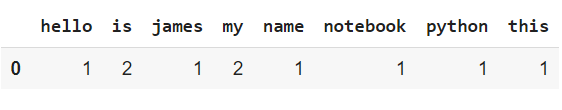

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()

In [26]:
# Email converted into number matrix

x_train_count = v.fit_transform(x_train.values)
x_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Gaussian Naive Bayes: Assumes that the features (predictor variables) in the data follow a Gaussian (normal) distribution. This variant is suitable for continuous or real-valued data.

Multinomial Naive Bayes: Assumes that the features represent discrete counts, such as word frequencies in a text classification task. This variant is suitable for data with a limited number of possible values.

Bernoulli Naive Bayes: A special case of Multinomial Naive Bayes that assumes the features are binary (0 or 1), such as the presence or absence of a word in a document.

Categorical Naive Bayes: An extension of Bernoulli Naive Bayes that allows for features with more than two possible values, such as movie ratings (1-5 stars).

Out-of-core Naive Bayes: A modification of the Naive Bayes algorithm that can handle large datasets that do not fit in memory by processing the data in chunks or batches. This can be achieved by using a technique called stochastic gradient descent to update the model parameters incrementally as new data is processed.

## 7. Model selection and implimentation (MultinomialNB)

In [29]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

## 8. Model training

In [31]:
model.fit(x_train_count, y_train)

MultinomialNB()

## 9. Model evaluations

In [33]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1])

In [34]:
x_test_count = v.transform(x_test)
model.predict(x_test_count)

array([0, 1, 0, ..., 0, 1, 0])

In [35]:
model.score(x_test_count, y_test)

0.986244019138756

In [36]:
pred = model.predict(x_test_count)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, pred)
cm

array([[1451,    6],
       [  17,  198]], dtype=int64)

### Sklearn Pipeline

Scikit-learn (sklearn) Pipeline is a tool for chaining multiple data processing and modeling steps into a single object that can be used for training and evaluating a machine learning model. The purpose of sklearn Pipeline is to simplify the code for machine learning workflows, improve code reusability, and reduce the risk of data leakage during modeling.

The pipeline object takes a sequence of data processing and modeling steps, where each step is a tuple containing a name and an instance of a data processing or modeling class. The pipeline applies each step in the sequence to the data, transforming the data at each step, and passing the transformed data to the next step. This allows for a streamlined workflow where data transformations and model fitting can be done in a single step, without needing to manually apply each transformation separately.

Furthermore, sklearn Pipeline provides several benefits, including:

**Code Reusability**: Once a pipeline has been defined, it can be reused with new data without needing to rewrite the entire processing and modeling pipeline.

**Parameter Tuning**: Sklearn pipeline allows us to perform grid search or randomized search over the entire pipeline, including all the data processing and modeling steps, to optimize the hyperparameters of the pipeline.

**Data Leakage Prevention**: The pipeline applies all the transformations to the training data, then fits the model to the transformed data. This prevents data leakage, which is the phenomenon where information from the test data leaks into the training process, leading to overfitting and poor generalization performance.

    Overall, sklearn Pipeline is a powerful tool for building complex machine learning workflows in a simple and efficient manner, allowing data scientists to focus on more important tasks, such as feature engineering and model selection.

In [41]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('Vectorizer' , CountVectorizer()),
    ('nb' , MultinomialNB())
])



In [42]:
clf.fit(x_train, y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [43]:
clf.score(x_test, y_test)

0.986244019138756

In [44]:
pred2 = clf.predict(x_test)

In [45]:
cm2 = confusion_matrix(y_test, pred2)
cm2

array([[1451,    6],
       [  17,  198]], dtype=int64)